In [5]:
x=c(9,13,6,8,10,4,14,8,11,7,9,
    7,5,14,13,16,10,12,11,14,15,18,
    7,16,9,9,11,13,15,13,10,11,6,
    17,14,19,9,11,14,10,16,10,16,14,
    13,13,9,15,10,11,12,4,14,20)
length(x)
y=c(rep(1,14),rep(0,40))

d = data.frame(X=x, Y=y)
n=nrow(d)

[1] 54

In [6]:
likeli=function(beta0,beta1) {
  A=exp(n*mean(y)*beta0 + beta1*sum(x*y)-((beta0/100)^2)/2-((beta1/100)^2)/2)
  B=1
  for (i in 1:n) {
    C=(1+exp(beta0+beta1*x[i]))^(-1)
    B=B*C
  }
  return(A*B)
}
##likelihood계산

In [8]:
beta0=0
beta1=0
likeli(beta0,beta1) ##beta0,beta1의 초기값을 0으로 주고 계산한 likelihood값

[1] 5.551115e-17

In [9]:
set.seed(201982190)
m=10000 ##iteration number
b0=numeric(0)
b1=numeric(0)
u=matrix(0,54,m)
b0[1]=0;b1[1]=0
##slice sample을 통해 뽑힐 베타들을 저장할 공간

for(j in 2:m) {
  a=exp(b0[j-1]*y+b1[j-1]*x*y) / (1 + exp(b0[j-1]+b1[j-1]*x))
  for(i in 1:n) {
    u[i,j-1]=runif(1,0,a[i])
  }
  L.0=max(log( u[1:14,j-1] / (1-u[1:14,j-1]) ) - b1[j-1]*x[1:14])
  U.0=min(log( (1-u[15:n,j-1]) / u[15:n,j-1]) - b1[j-1]*x[15:n])
  b0[j]=rtruncnorm(1,a=L.0, b=U.0, mean=0, sd=100)
  L.1=max(log( u[1:14,j-1] / (1-u[1:14,j-1]) )/x[1:14] - b0[j]/x[1:14])
  U.1=min(log( (1-u[15:n,j-1]) / u[15:n,j-1])/x[15:n] - b0[j]/x[15:n])
  b1[j]=rtruncnorm(1,a=L.1,b=U.1,mean=0,sd=100)  
}

In [10]:
res <- data.frame(beta0=b0[5001:m],beta1=b1[5001:m])

beta0_cum=numeric(1)
beta0_ergodic=numeric(1)
beta1_cum=numeric(1)
beta1_ergodic=numeric(1)

for(i in 2:nrow(res)) {
  beta0_cum[i]=beta0_cum[i-1]+res$beta0[i]
  beta0_ergodic[i]=beta0_cum[i]/i
  beta1_cum[i]=beta1_cum[i-1]+res$beta1[i]
  beta1_ergodic[i]=beta1_cum[i]/i
}

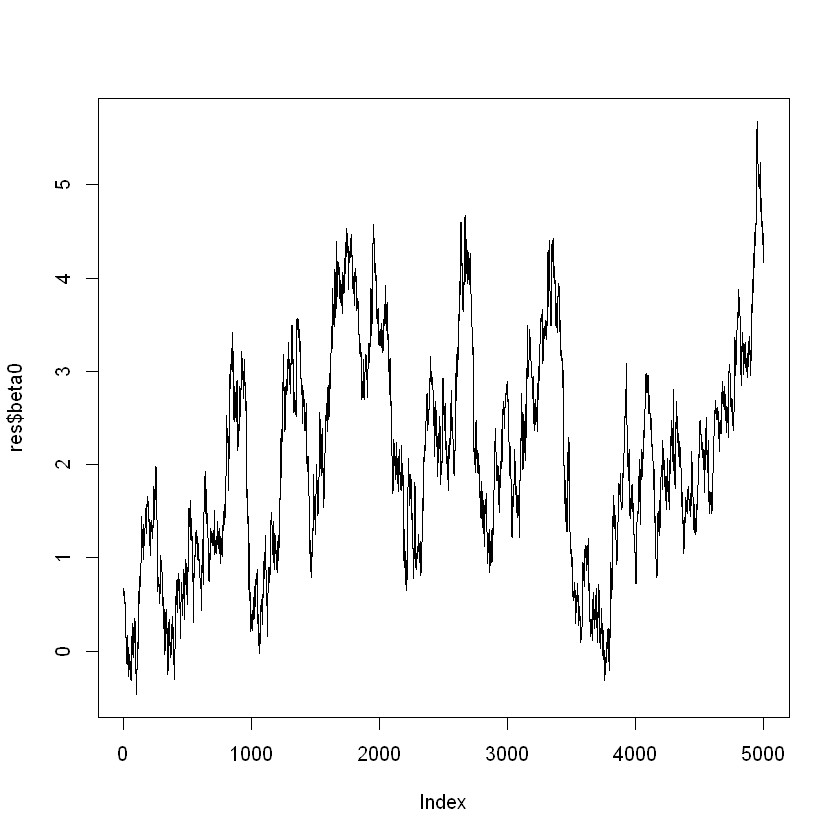

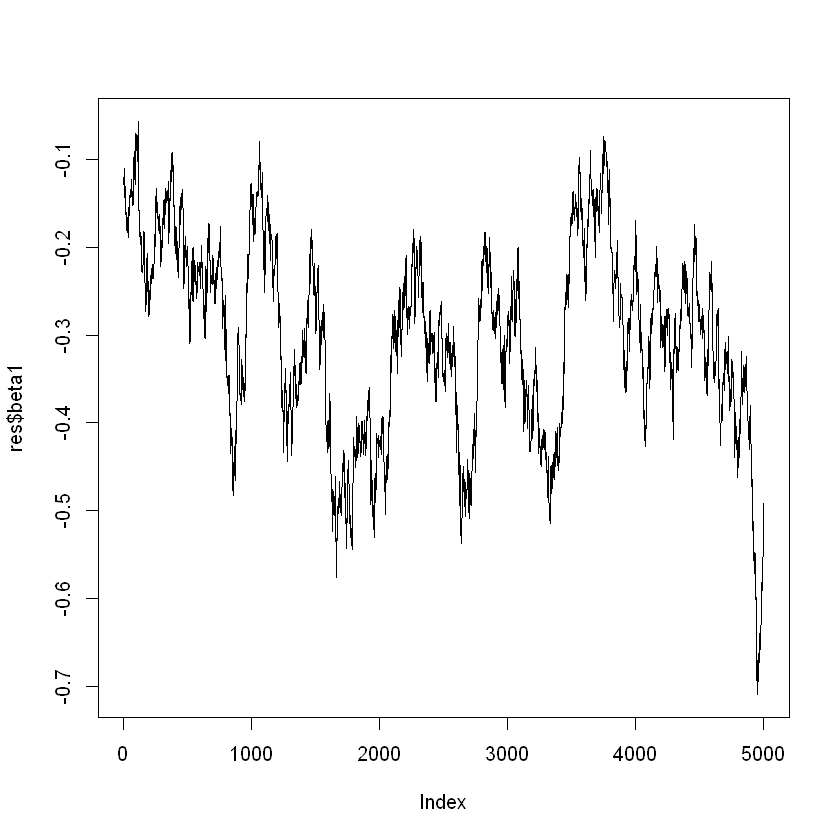

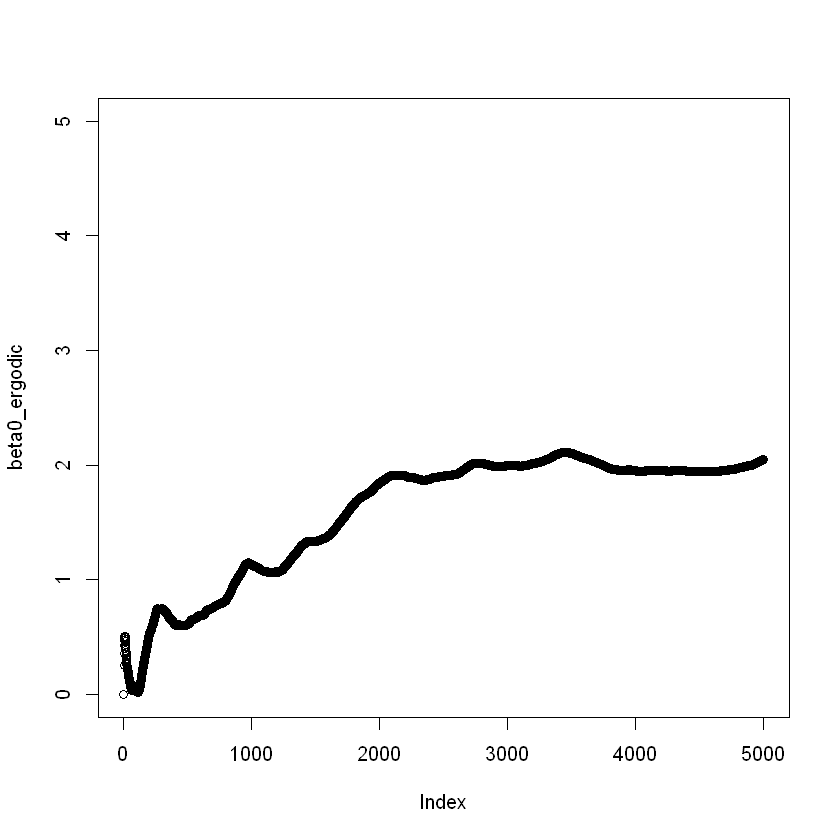

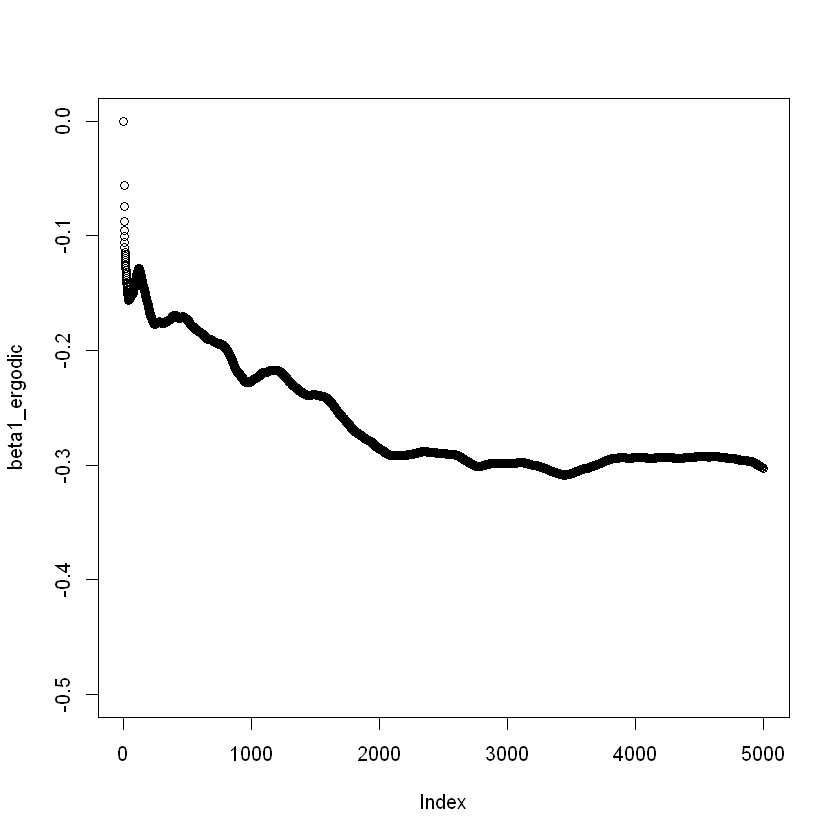

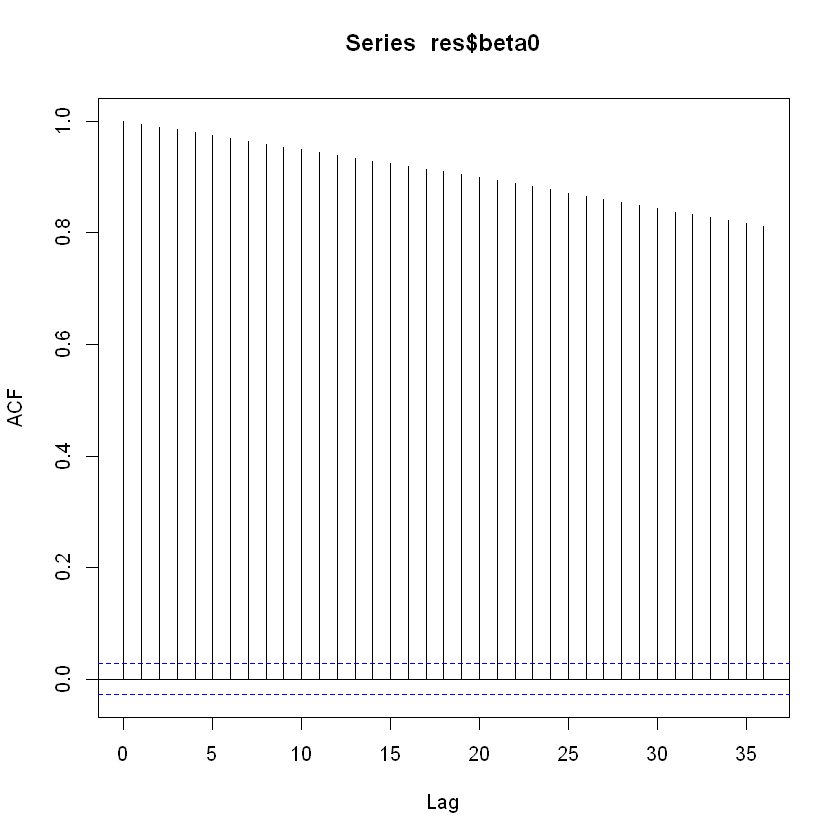

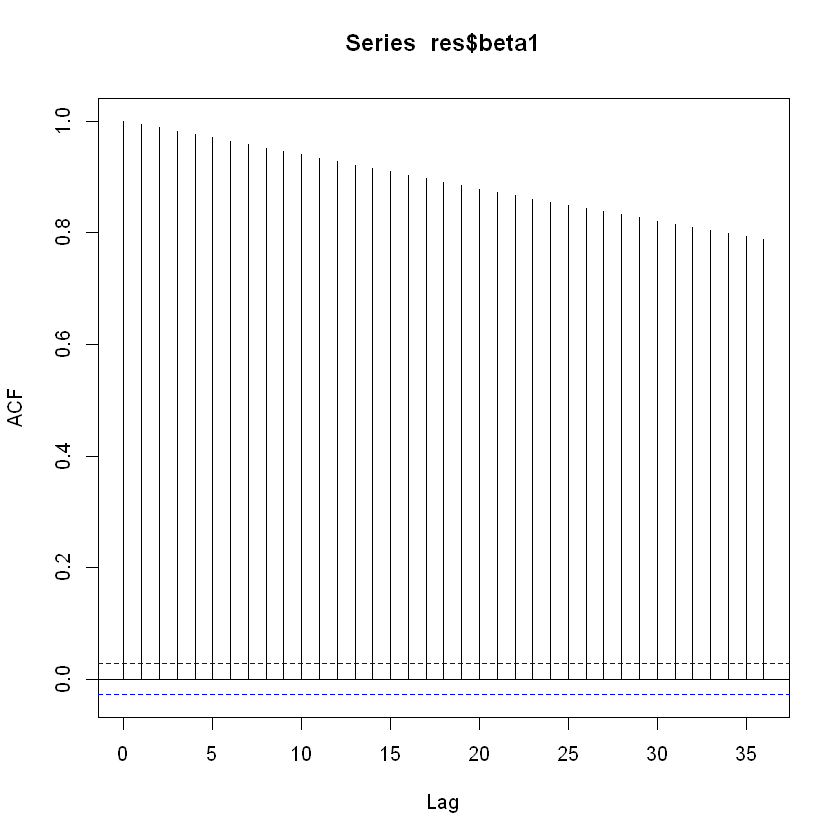

In [13]:
plot(res$beta0,type='l')
plot(res$beta1,type='l')
plot(beta0_ergodic, ylim=c(0,5))
plot(beta1_ergodic, ylim=c(-.5,0))
acf(res$beta0)
acf(res$beta1)
